In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel(r"C:\Users\Jishanth M I\Downloads\DS1_C5_S1_Income_Data_Challenge.xlsx")
data

,Age,WorkClass,Education,Education_Num,Marital_Status,Occupation,Relationship,Gender,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,40,United-States,<=50K
1,50,Self-emp,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,20,United-States,<=50K


In [3]:
# Task 1
#Display the basic information about the dataset, which includes all the columns with the data type of the columns. Also, display the count of missing values for each column.


# Display basic information about the dataset
print(data.info())

# Display count of missing values for each column
missing_values = data.isnull().sum()
print("\nCount of Missing Values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education_Num   32561 non-null  int64 
 4   Marital_Status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Gender          32561 non-null  object
 8   Hours_Per_Week  32561 non-null  int64 
 9   Native_Country  32561 non-null  object
 10  Income_Bracket  32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB
None

Count of Missing Values:
 Age               0
WorkClass         0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64


In [4]:
# Task 2
#Create two different lists of categorical columns and numerical columns by defining a function to identify the data type.


data_cat=data.select_dtypes(include='object')
print(data_cat.columns)

data_con=data.select_dtypes(include='number')
print(data_con.columns)

Index(['WorkClass', 'Education', 'Marital_Status', 'Occupation',
       'Relationship', 'Gender', 'Native_Country', 'Income_Bracket'],
      dtype='object')
Index(['Age', 'Education_Num', 'Hours_Per_Week'], dtype='object')


In [5]:
# Task 3
#Define a function to find the unique values and mode value from each categorical column (identified in Task 2).
#Also, check for the missing values and perform missing value treatment, if required



#Number of unique categories
num_categories = data_cat.nunique()
print("Number of Categories:", num_categories)
        
# Mode of each column
mode_values = data_cat.mode()
print("Mode:", mode_values)
        
# Count of missing values for a specific column
missing_count = data_cat.isnull().sum()
print("Missing Values:", missing_count)

Number of Categories: WorkClass          9
Education         16
Marital_Status     7
Occupation        15
Relationship       6
Gender             2
Native_Country    42
Income_Bracket     2
dtype: int64
Mode:   WorkClass Education       Marital_Status       Occupation Relationship  \
0   Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   

  Gender  Native_Country Income_Bracket  
0   Male   United-States          <=50K  
Missing Values: WorkClass         0
Education         0
Marital_Status    0
Occupation        0
Relationship      0
Gender            0
Native_Country    0
Income_Bracket    0
dtype: int64


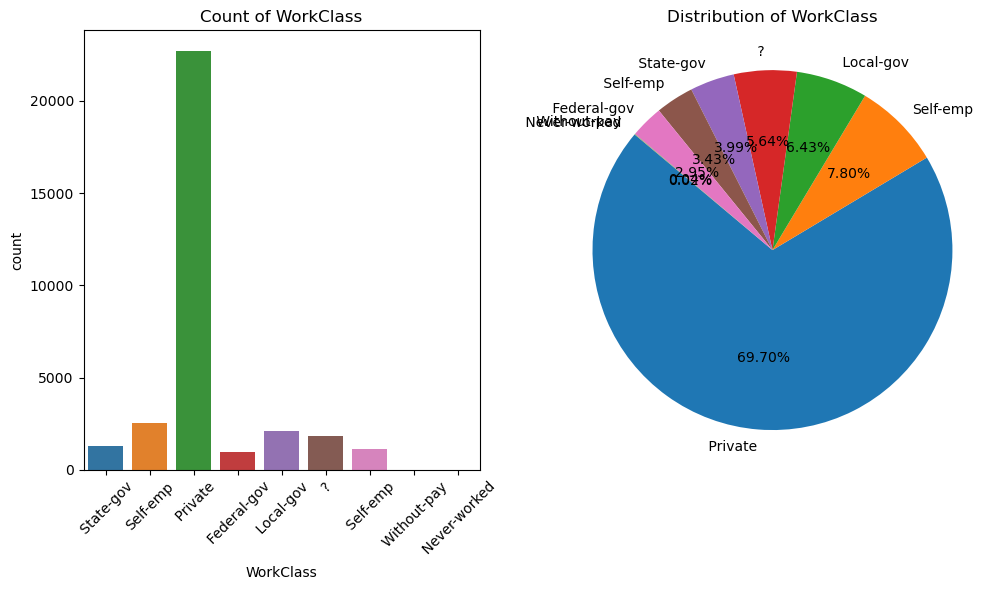

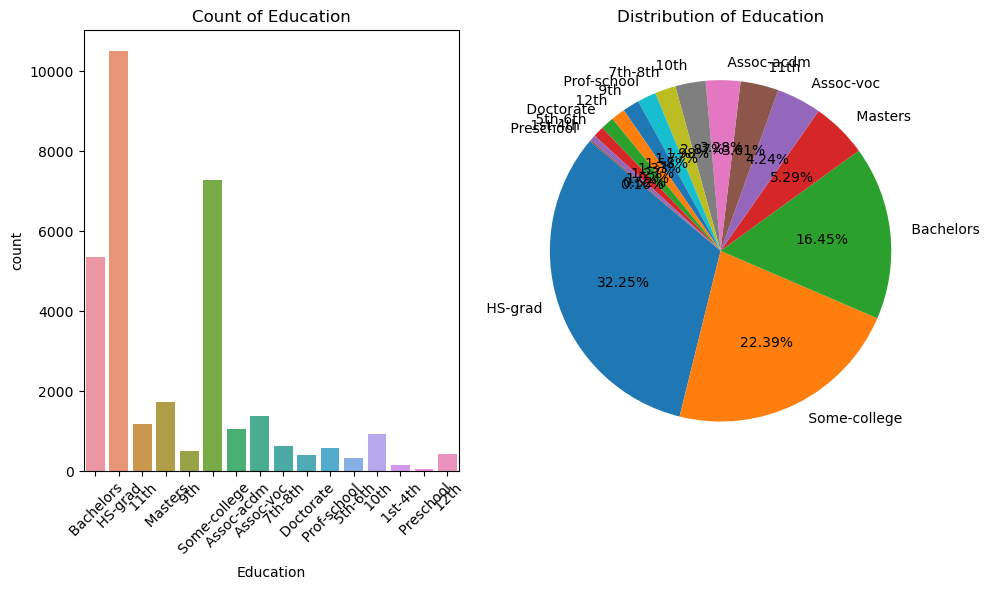

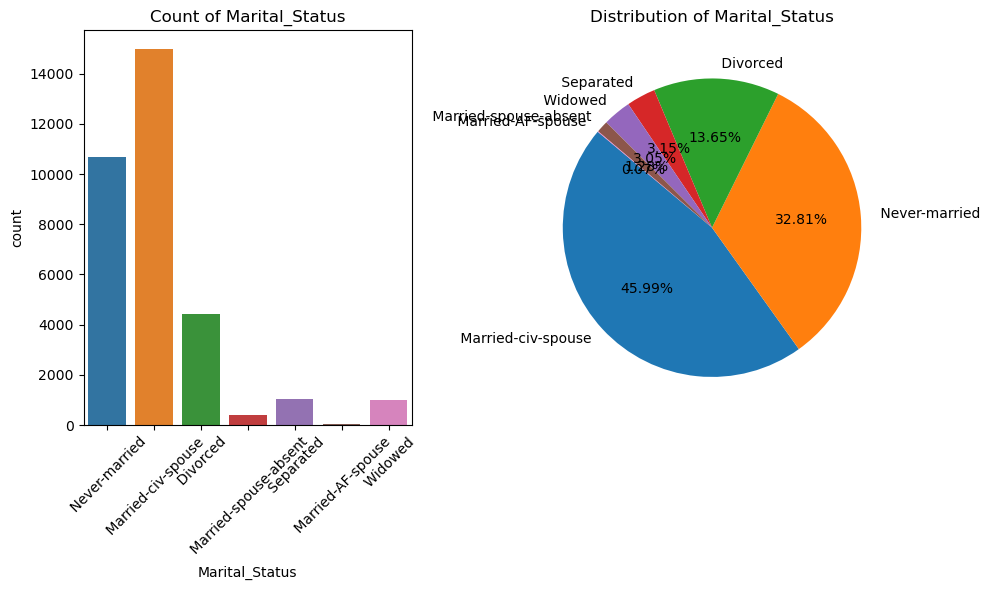

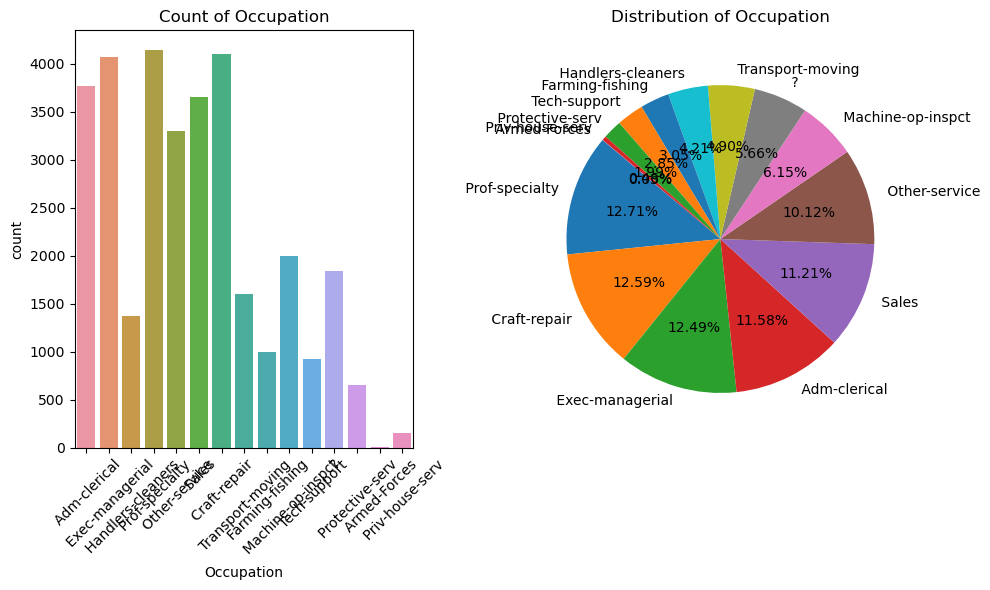

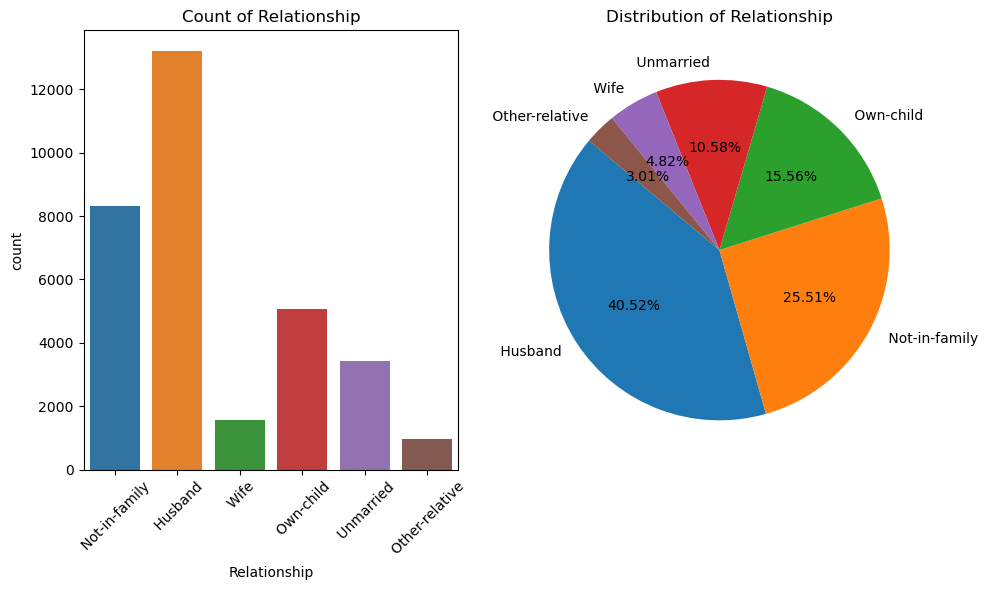

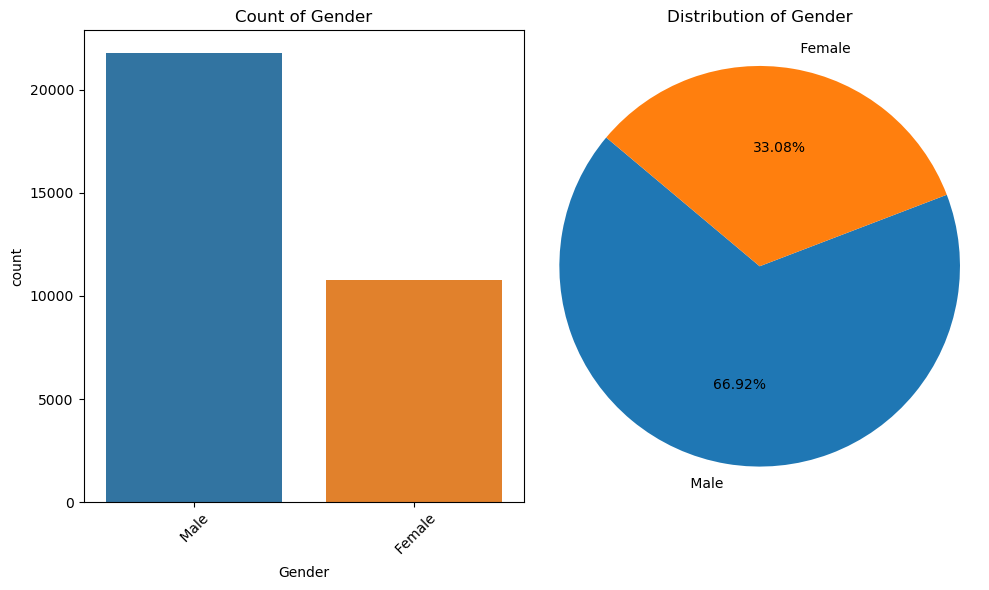

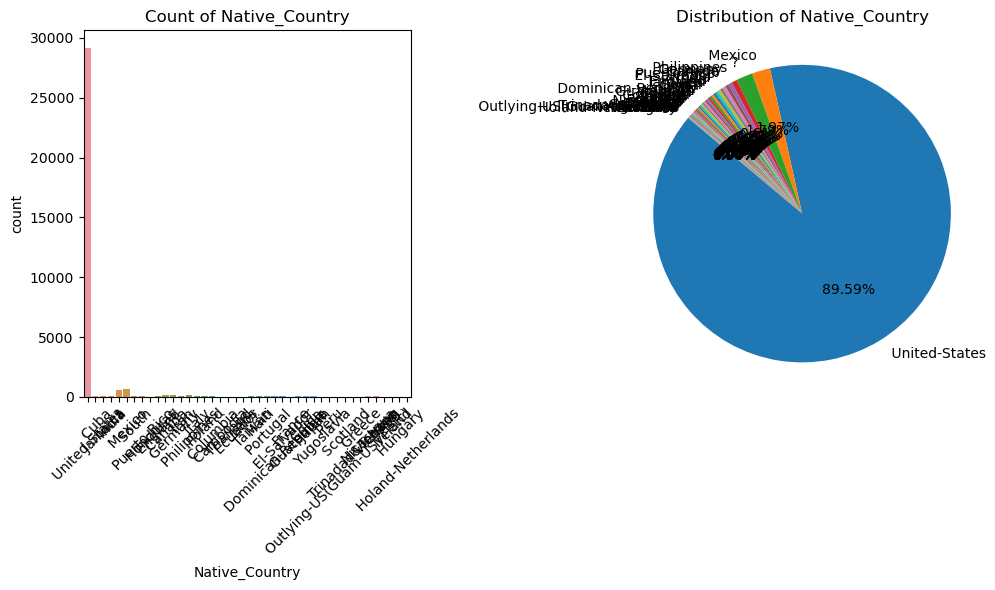

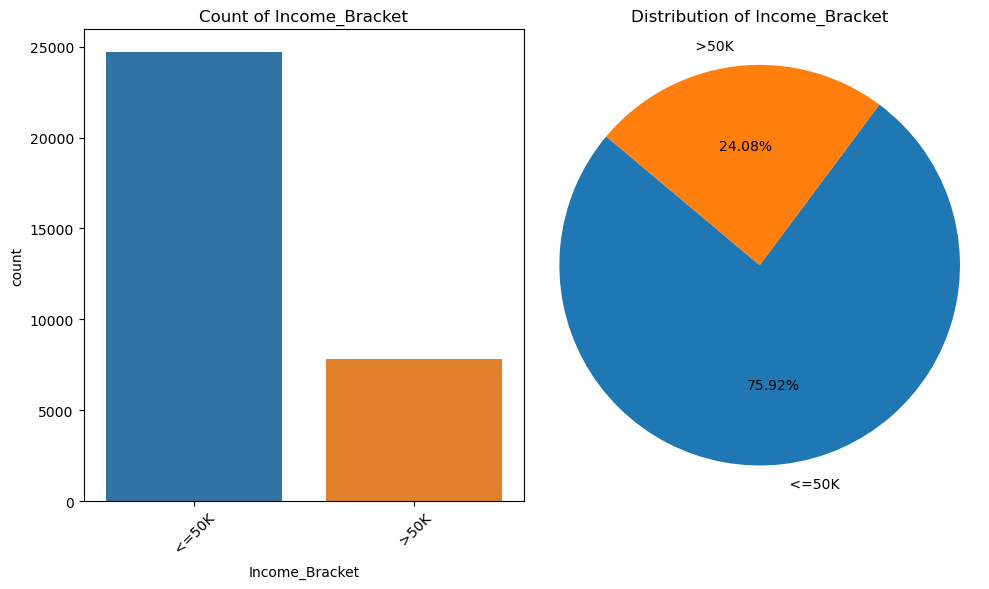

In [8]:
# Task 4
#Perform descriptive analysis of the categorical columns (identified in Task 2) with the help of univariate graphs/charts.
#Note: Use the bar graph/count plot and pie chart to visualize the categorical columns.



# Categorical columns in the dataset
categorical_columns = ['WorkClass', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Gender', 'Native_Country', 'Income_Bracket']

# Loop through categorical columns and create visualizations
for column in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Count plot (bar graph)
    plt.subplot(1, 2, 1)
    sb.countplot(data=data, x=column)
    plt.xticks(rotation=45)
    plt.title(f'Count of {column}')

    # Pie chart
    plt.subplot(1, 2, 2)
    value_counts = data[column].value_counts()
    plt.pie(value_counts, labels=value_counts.index, autopct='%.2f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'Distribution of {column}')

    plt.tight_layout()
    plt.show()

In [9]:
# Task 5

# Measures of central tendency
mean_value = data_con.mean()
median_value = data_con.median()
print("Mean:", mean_value)
print("Median:", median_value)
        
# Standard deviation
std_deviation = data_con.std()
print("Standard Deviation:", std_deviation)

# Count of missing values
missing_count = data_con.isnull().sum()
print("Missing Values:", missing_count)

# Skewness
from scipy.stats import skew
skewness = skew(data_con.dropna())  # Drop missing values before calculating skewness
print("Skewness:", skewness)

Mean: Age               38.581647
Education_Num     10.080679
Hours_Per_Week    40.437456
dtype: float64
Median: Age               37.0
Education_Num     10.0
Hours_Per_Week    40.0
dtype: float64
Standard Deviation: Age               13.640433
Education_Num      2.572720
Hours_Per_Week    12.347429
dtype: float64
Missing Values: Age               0
Education_Num     0
Hours_Per_Week    0
dtype: int64
Skewness: [ 0.55871763 -0.31166151  0.22763205]


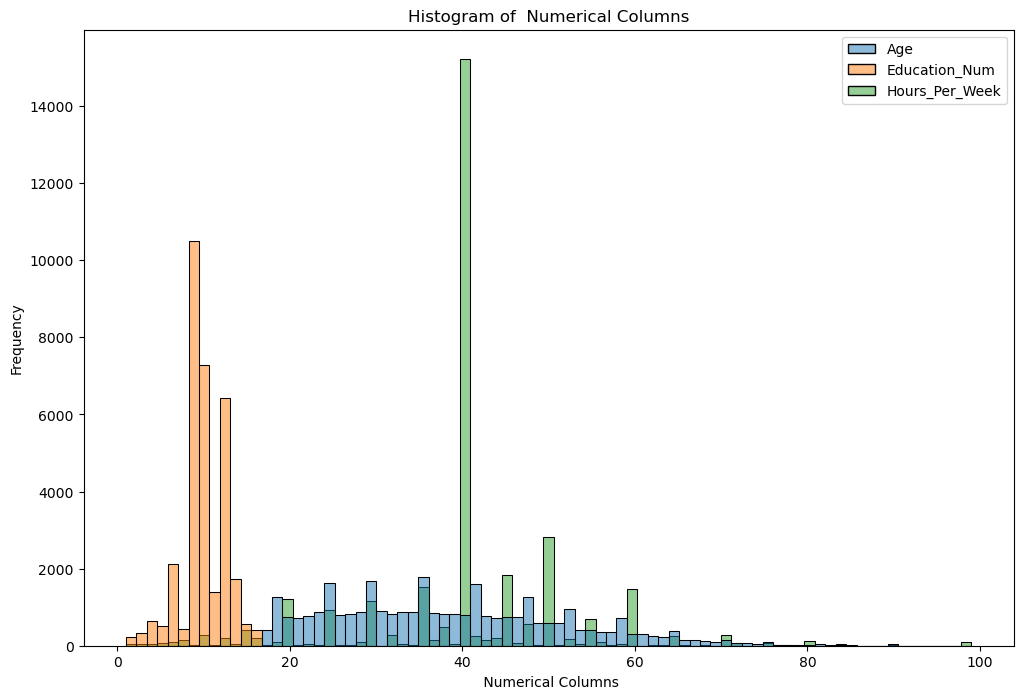

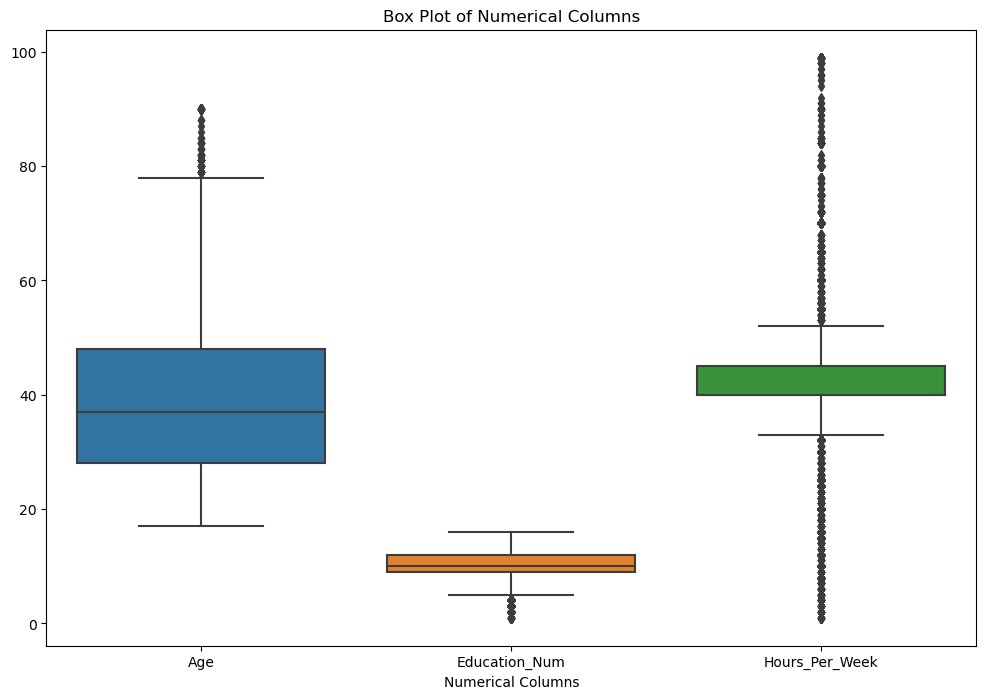

In [27]:
# Task 6
#Perform descriptive analysis of the numerical columns (identified in Task 2) with the help of univariate graphs/charts.
#Note: Use the histogram and box plot to visualize the numerical columns.


# Set up subplots for histograms
plt.figure(figsize=(12, 8))
sb.histplot(data_con)
plt.title('Histogram of  Numerical Columns')
plt.xlabel(' Numerical Columns')
plt.ylabel('Frequency')
plt.show()

# Set up subplots for box plots
plt.figure(figsize=(12, 8))
sb.boxplot(data=data_con)
plt.title('Box Plot of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.show()